Импортируем библиотеки

In [51]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import VBox
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_pacf

Создаём Pandas DataFrame из файла IBM.csv

In [23]:
file_path = 'IBM.csv'
df = pd.read_csv(file_path)

Отрисуем график стоимости акций

In [24]:
fig1 = go.FigureWidget(layout_yaxis_range=[0,np.max(df['Close'])*1.1])
fig1.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode="lines+markers"
))
fig1.update_xaxes(title='Дата')
fig1.update_yaxes(title='Стоимость')
fig1

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '5c2ac3bf-77ab-42eb-b2c2-52a3470a6b4f',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])}],
    'layout': {'template': '...',
               'xaxis': {'title': {'text': 'Дата'}},
               'yaxis': {'range': [0, 165.6270077], 'title': {'text': 'Стоимость'}}}
})

### Тест Дики-Фуллера

In [25]:
def adfuller_test(time_series, p_value=0.05):
    result = sm.tsa.adfuller(time_series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    if result[1] <= p_value:
        print("Данные нестационарны.")
    else:
        print("Данные стационарны.")

adfuller_test(df['Close'])

ADF Statistic: -1.3183845455920598
p-value: 0.6207199558312008
Critical Values:
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876
Данные стационарны.


### Линейная регрессия

In [43]:
# Построение линейной регрессии
x = np.array(list(range(len(df['Date']))))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, df['Close'])

# Построение графика
trace2 = go.Scatter(
    x=df['Date'],
    y=slope * x + intercept,
    mode='lines',
    name='Линейная регрессия'
)

fig2 = go.FigureWidget(data=[trace1,trace2])
fig2.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')


def redraw_linear(start, end):
    if start < end:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[start:end], df['Close'][start:end])
        fig2["data"][1].x = df['Date'][start:end]
        fig2["data"][1].y = slope * x[start:end] + intercept
        # Вывод параметров
        print(f"Угловой коэффициент (slope): {slope}")
        print(f"Пересечение (intercept): {intercept}")
        print(f"Коэффициент корреляции (r_value): {r_value}")
        print(f"p-value: {p_value}")
        print(f"Стандартная ошибка (std_err): {std_err}")

interact(
    redraw_linear, 
    start=widgets.IntSlider(min=0, max=len(df['Date']), step=1, value=0), 
    end=widgets.IntSlider(min=0, max=len(df['Date']), step=1, value=len(df['Date']))
)
fig2

interactive(children=(IntSlider(value=0, description='start', max=250), IntSlider(value=250, description='end'…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': 'b11580dd-90d0-498c-bb39-2a6b827d82ec',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines',
              'name': 'Линейная регрессия',
              'type': 'scatter',
              'uid': '7e4b185c-27ff-4332-8cc2-927bb45de283',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([132.19851744, 132.22048597, 132.24245451, ..., 137.62474561,
                          137.64671415, 137.66868268])}],
    'layout': {'template': '...', 'xaxis': {'title'

### Автокоррелограмма

(array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40]),
 array([0.83319599, 0.83761106, 0.84200082, 0.84631173, 0.85073125,
        0.85515836, 0.8595509 , 0.86388929, 0.86826555, 0.87270616,
        0.8771679 , 0.88163187, 0.88603584, 0.89043552, 0.89466093,
        0.89891039, 0.90308003, 0.9071847 , 0.91113006, 0.91505208,
        0.91893196, 0.92279138, 0.92672745, 0.93052292, 0.93438054,
        0.93824411, 0.94218937, 0.94625418, 0.95042271, 0.95460102,
        0.95867484, 0.96271683, 0.9668392 , 0.97098999, 0.97509241,
        0.97920006, 0.98333397, 0.98747041, 0.99161065, 0.995

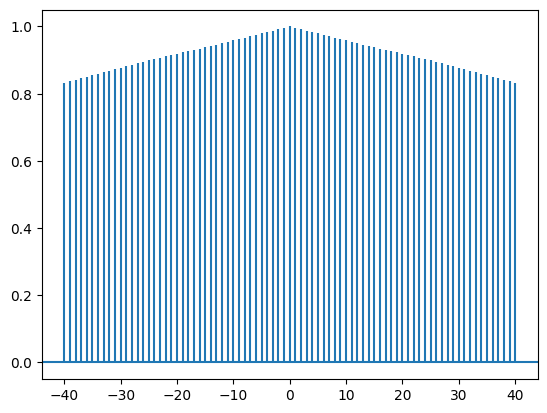

In [48]:
plt.acorr(df['Close'], maxlags = 40) 

### Бокс-Кокс

In [47]:
def boxcox(data, lamb):
    data = np.array(data)
    if lamb == 0:
        return np.log(data)
    else:
        return np.power(data, (lamb-1))/lamb
    
boxcox_data = boxcox(df['Close'], 0)


# Построение графика
trace2 = go.Scatter(
    x=df['Date'],
    y=boxcox_data,
    mode='lines',
    name='Boxcox'
)

fig3 = go.FigureWidget(data=[trace2])
fig3.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')


def redraw_boxcox(lamb):
    boxcox_data = boxcox(df['Close'], lamb)
    fig3["data"][0].y = boxcox_data

interact(
    redraw_boxcox, 
    lamb=widgets.FloatSlider(min=0, max=2, step=0.1, value=0), 
)
fig3


interactive(children=(FloatSlider(value=0.0, description='lamb', max=2.0), Output()), _dom_classes=('widget-in…

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'Boxcox',
              'type': 'scatter',
              'uid': 'fa4a696c-36b6-422c-bac2-848d3ddcd8af',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([4.84991868, 4.83866005, 4.82775358, ..., 4.98736669, 4.99281075,
                          4.98353816])}],
    'layout': {'template': '...', 'xaxis': {'title': {'text': 'Дата'}}, 'yaxis': {'title': {'text': 'Стоимость'}}}
})

### Частиная автокорреляция

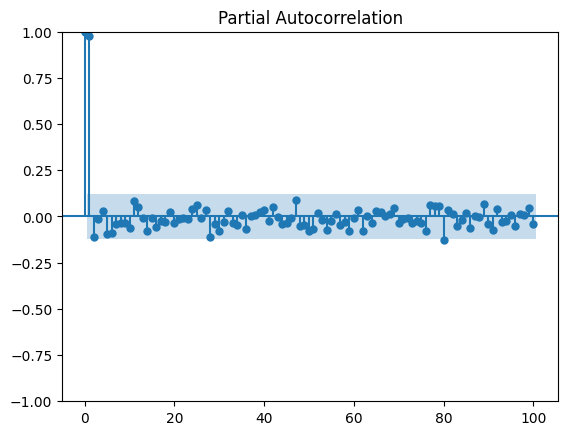

In [56]:
plot_pacf(df['Close'], lags=100)
plt.show()